In [35]:
# day 3 -----------------------------
# TODO: make a program that creates a visualization of the two wires
import time

def get_inputs(path):
    with open(path) as f:
        input_string = f.read()
        # split on '\n' then on commas
    input_list = input_string.split('\n')
    wire1 = input_list[0].split(',')
    wire2 = input_list[1].split(',')

    return wire1, wire2


def generate_path(wire_input):
    # initialize list of coordinates that represents the path
    coord_list = [(0, 0)]
    for step in wire_input:
        direction = step[0]
        distance = int(step[1:])
        for i in range(distance):
            if direction == 'L':
                new_x = coord_list[-1][0] - 1
                new_y = coord_list[-1][1]
            elif direction == 'R':
                new_x = coord_list[-1][0] + 1
                new_y = coord_list[-1][1]
            elif direction == 'U':
                new_x = coord_list[-1][0]
                new_y = coord_list[-1][1] + 1
            elif direction == 'D':
                new_x = coord_list[-1][0]
                new_y = coord_list[-1][1] - 1
            else:
                return f"Invalid Direction: {direction}"

            # add new coordinate to the list
            coord_list.append((new_x, new_y))

    return coord_list


def get_distance(coord1, coord2):
    # manhattan distance: the sum of the absolute values of the difference of the cartesian coordinates
    x_diff = abs(coord1[0] - coord2[0])
    y_diff = abs(coord1[1] - coord2[1])

    return x_diff + y_diff


def solve_puzzle1(wp1, wp2):
    # initialize wire_coordinate lists
    wire1 = generate_path(wp1)
    wire2 = generate_path(wp2)

    # print(wire1)
    # print(wire2)

    # get distance of all intersecting points and the starting point
    dist_list = []
    closest_coords = None
    print("Lengths:", len(wire1), len(wire2))
    shared_coords = set(wire1[1:]).intersection(set(wire2))
    for coord in shared_coords:
        temp_dist = get_distance(coord, (0, 0))
        dist_list.append(temp_dist)
        if temp_dist == min(dist_list):
            closest_coords = coord
            
    print(closest_coords)
    return min(dist_list)


def solve_puzzle2(wp1, wp2):
    # generate coordinates
    wire1 = generate_path(wp1)
    wire2 = generate_path(wp2)

    # get shared coordinates
    shared_coords = set(wire1[1:]).intersection(set(wire2))
    step_list = []
    least_steps_coord = None
    for coord in shared_coords:
        steps1 = wire1.index(coord)
        steps2 = wire2.index(coord)
        step_list.append(steps1 + steps2)
        if steps1 + steps2 == min(step_list):
            least_steps_coord = coord
    print(least_steps_coord)
    return min(step_list)



def main():
    test_wire1 = "R75,D30,R83,U83,L12,D49,R71,U7,L72".split(',')
    test_wire2 = "U62,R66,U55,R34,D71,R55,D58,R83".split(',')
    # test_wire1 = "R4,U4".split(',')
    # test_wire2 = "U4,R6".split(',')
    print(test_wire1)
    print(test_wire2)
    print("Test Result:", solve_puzzle1(test_wire1, test_wire2))

    file_path = 'data/input3.txt'
    wire1, wire2 = get_inputs(file_path)
#     print(wire1)
#     print(wire2)
    # start = time.time()
    print("Real Result1:", solve_puzzle1(wire1, wire2))
    # print(round((time.time() - start)/60,2))
    print("Real Result2:", solve_puzzle2(wire1, wire2))

    return


if __name__ == "__main__":
    main()


['R75', 'D30', 'R83', 'U83', 'L12', 'D49', 'R71', 'U7', 'L72']
['U62', 'R66', 'U55', 'R34', 'D71', 'R55', 'D58', 'R83']
Lengths: 483 485
(155, 4)
Test Result: 159
Lengths: 151345 152334
(990, 274)
Real Result1: 1264
(2890, 467)
Real Result2: 37390


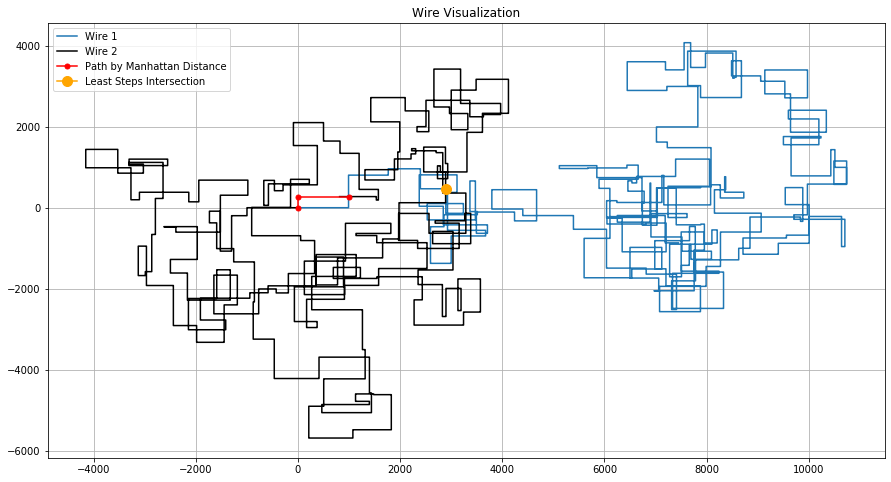

In [46]:
# make a visualization of the wires
from matplotlib import pyplot as plt
file_path = 'data/input3.txt'
wire1, wire2 = get_inputs(file_path)

wp1 = generate_path(wire1)
wp2 = generate_path(wire2)
w1_x = [coord[0] for coord in wp1]
w1_y = [coord[1] for coord in wp1]
w2_x = [coord[0] for coord in wp2]
w2_y = [coord[1] for coord in wp2]

plt.figure(figsize=(15,8))
plt.title("Wire Visualization")
# plt.hlines(y = 0, xmin=-5000, xmax = 9000, color = 'black', linestyles='--')
# plt.vlines(x = 0, ymin=-6000, ymax = 4000, color = 'black', linestyles='--')
plt.grid()
plt.plot(w1_x, w1_y, label = "Wire 1")
plt.plot(w2_x, w2_y, label = "Wire 2", color = 'black')
plt.plot([0,0,990], [0,274,274], marker='o', markersize=5, color="red", label = 'Path by Manhattan Distance')
plt.plot([2890], [467], marker='o', markersize=10, color="Orange", label = 'Least Steps Intersection')



plt.legend(loc = 'upper left')


plt.show()